Install Libs

In [ ]:
!pip install wandb --upgrade
!pip install pytorch-lightning
!pip install segmentation-models-pytorch
!pip install albumentations

Download Dataset

In [ ]:
# https://drive.google.com/file/d//view?usp=sharing
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1mQCNp8dq499qnJI0YCc0hTVfmm4ppxO5' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1mQCNp8dq499qnJI0YCc0hTVfmm4ppxO5" -O "download.tar.gz" && rm -rf /tmp/cookies.txt
!tar -xvf download.tar.gz

# EDA

Here we will explore the data

In [1]:
!ls

3p5_shards	   3p5_shards_download.sh  EDA.ipynb	    trainer.ipynb
3p5_shards.tar.gz  Dataset_-17.3375dB	   download.tar.gz


In [2]:
import numpy as np
import seaborn as sns
import os

# vars
DATA_DIR = 'Dataset_-17.3375dB'

In [3]:
!ls $DATA_DIR

-17.3375dB_highFreqChTrain.npy	-17.3375dB_maxRateTrain.npy
-17.3375dB_highFreqChVal.npy	-17.3375dB_maxRateVal.npy
-17.3375dB_inpTrain.npy		-17.3375dB_trainInpLoc.npy
-17.3375dB_inpVal.npy		-17.3375dB_trainOutLoc.npy
-17.3375dB_labelTrain.npy	-17.3375dB_valInpLoc.npy
-17.3375dB_labelVal.npy		-17.3375dB_valOutLoc.npy


In [4]:
inp_train = np.load(f'{DATA_DIR}/-17.3375dB_inpTrain.npy')
print(inp_train.shape)
print(inp_train[:, 0])

(256, 76146)
[ 0.34402435  0.35276638  0.24912292  0.04245569 -0.07585518  0.11675079
  0.32772158  0.41844028  0.38961957  0.34769169  0.41456424  0.21615378
 -0.10762008  0.11693366  0.26621293  0.35885817  0.20991388  0.35602942
  0.35236283  0.32064236 -0.25278387 -0.19930945  0.09919291  0.33095766
  0.26639666  0.40680209  0.47222736  0.29147502 -0.47701936 -0.20684795
  0.01463959  0.19980429  0.09904804  0.27226746  0.29832213  0.35282602
 -0.2802205  -0.22275559 -0.12587274  0.1095431  -0.00487931  0.19723955
  0.36733067  0.39577579 -0.35610948 -0.31777863 -0.28473125  0.03125232
 -0.08544636  0.11759862  0.31293973  0.33906337 -0.32830403 -0.34982521
 -0.35060942 -0.12330077 -0.22415774 -0.1148948   0.28720918  0.44913657
 -0.27646004 -0.44266145 -0.46511541 -0.12060044 -0.31348222 -0.25484867
  0.13597803  0.31050406 -0.23749792 -0.3516434  -0.45290542 -0.43036628
 -0.43242879 -0.26851891 -0.0762867   0.14639127 -0.11255325 -0.37711983
 -0.4561838  -0.37594349 -0.35655316 -

So 76k users, with 256. Need to reshape 2x4x32x76146. (num_atenas x channels x num_users)

In [5]:
inp_train = inp_train.reshape((2, 4, 32, -1))
inp_train[:, :, :, 0]

array([[[ 0.34402435,  0.35276638,  0.24912292,  0.04245569,
         -0.07585518,  0.11675079,  0.32772158,  0.41844028,
          0.38961957,  0.34769169,  0.41456424,  0.21615378,
         -0.10762008,  0.11693366,  0.26621293,  0.35885817,
          0.20991388,  0.35602942,  0.35236283,  0.32064236,
         -0.25278387, -0.19930945,  0.09919291,  0.33095766,
          0.26639666,  0.40680209,  0.47222736,  0.29147502,
         -0.47701936, -0.20684795,  0.01463959,  0.19980429],
        [ 0.09904804,  0.27226746,  0.29832213,  0.35282602,
         -0.2802205 , -0.22275559, -0.12587274,  0.1095431 ,
         -0.00487931,  0.19723955,  0.36733067,  0.39577579,
         -0.35610948, -0.31777863, -0.28473125,  0.03125232,
         -0.08544636,  0.11759862,  0.31293973,  0.33906337,
         -0.32830403, -0.34982521, -0.35060942, -0.12330077,
         -0.22415774, -0.1148948 ,  0.28720918,  0.44913657,
         -0.27646004, -0.44266145, -0.46511541, -0.12060044],
        [-0.31348222, 

Let's See Labels

In [10]:
label_train = np.load(f'{DATA_DIR}/-17.3375dB_labelTrain.npy')
print(label_train.shape)
print(label_train[:, :])

(76146, 1)
[[37]
 [57]
 [45]
 ...
 [45]
 [60]
 [22]]


Let's See the label distribution

val: count
----------
 3:    1
 4:   54
 5:  443
 6:  710
 7:  851
 8: 1056
 9: 1268
10: 1323
11: 1528
12: 1638
13: 1645
14: 1864
15: 2078
16: 1861
17: 1635
18: 1566
19: 1322
20: 1256
21: 1132
22: 1080
23:  988
24:  966
25:  945
26:  899
27:  880
28:  869
29:  811
30:  798
31:  788
32:  807
33:  797
34:  797
35:  821
36:  802
37:  806
38:  830
39:  850
40:  882
41:  930
42:  990
43: 1022
44: 1076
45: 1131
46: 1167
47: 1338
48: 1437
49: 1556
50: 1720
51: 1952
52: 2223
53: 2548
54: 2630
55: 2475
56: 2316
57: 2155
58: 2052
59: 1819
60: 1707
61: 1405
62:  753
63:   94
64:    3


/home/ubuntu/miniconda3/envs/619/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:>

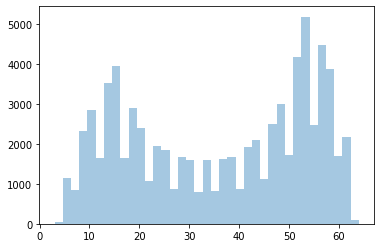

In [11]:
idx = np.unique(label_train, return_counts=True)
print('val: count')
print('----------')
for v, c in zip(*idx):
    print(f'{v:2d}: {c:4d}')
    
sns.distplot(label_train, kde=False)

Classes like **64** and **3** will be problem. But there are no classes for 1, 2. Is it so with val_data too!

(32635, 1)
val: count
----------
 4:   13
 5:  159
 6:  311
 7:  410
 8:  477
 9:  544
10:  583
11:  622
12:  672
13:  786
14:  778
15:  866
16:  761
17:  700
18:  650
19:  552
20:  515
21:  502
22:  444
23:  452
24:  415
25:  367
26:  356
27:  350
28:  348
29:  353
30:  344
31:  341
32:  326
33:  337
34:  338
35:  316
36:  341
37:  366
38:  363
39:  381
40:  385
41:  383
42:  384
43:  434
44:  447
45:  500
46:  572
47:  546
48:  615
49:  696
50:  766
51:  856
52:  940
53: 1081
54: 1110
55: 1030
56:  971
57:  962
58:  882
59:  884
60:  753
61:  621
62:  332
63:   43
64:    3


<AxesSubplot:>

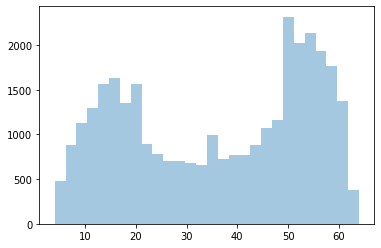

In [12]:
label_val = np.load(f'{DATA_DIR}/-17.3375dB_labelVal.npy')
print(label_val.shape)

idx = np.unique(label_val, return_counts=True)
print('val: count')
print('----------')
for v, c in zip(*idx):
    print(f'{v:2d}: {c:4d}')
    
sns.distplot(label_val, kde=False)

/home/ubuntu/miniconda3/envs/619/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

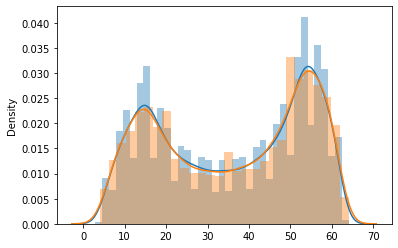

In [54]:
# Let's compare train and val distribution
sns.distplot(label_train, kde=True)
sns.distplot(label_val, kde=True)

Yeah, almost the same distribution. We don't have to worry about change if train and val set. Even KDE is overlapping.

In [70]:
shard1 = dict(np.load('3p5_shards/channel_0.npz'))['arr_0']
shard1.shape

(1000, 4, 32)

In [71]:
shard1[0, :, :]

array([[-4.64011163e-05+1.22834175e-05j, -1.99560051e-05+3.47538488e-05j,
         2.34045033e-06+3.23303153e-05j,  1.57503072e-05+2.85313046e-05j,
         3.62408216e-05+1.86887315e-05j,  4.71549386e-05-1.50664536e-05j,
         2.05251296e-05-4.96139407e-05j, -2.39663386e-05-4.57138207e-05j,
        -4.25956329e-05-1.21955896e-05j, -3.36411005e-05+1.28587011e-05j,
        -2.31148896e-05+2.50991334e-05j, -7.88544864e-06+4.02877482e-05j,
         2.64676266e-05+4.25590293e-05j,  5.46914689e-05+8.97463444e-06j,
         4.14044362e-05-3.55449325e-05j,  1.81547690e-06-4.80056120e-05j,
        -2.37882042e-05-3.14245965e-05j, -3.24627359e-05-1.47192683e-05j,
        -4.08171480e-05+3.88960891e-06j, -3.46280166e-05+3.62240569e-05j,
         3.95261962e-06+5.62819349e-05j,  4.58147384e-05+3.36039437e-05j,
         5.01678157e-05-1.02924818e-05j,  2.56533903e-05-3.39209173e-05j,
         4.12079636e-06-3.69100292e-05j, -1.54315956e-05-3.76399122e-05j,
        -4.33015054e-05-2.40219087e-05